# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Canciones" (14 de enero de 2020)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [2]:
import csv
from datetime import datetime
from matplotlib import pyplot as plt
from collections import namedtuple

## 1. Carga de datos (0.5 puntos)

Tomaremos la información de un fichero de entrada llamado <code>Spotify.csv</code> en el que se encuentran registrados datos de las canciones más escuchadas en 2019 en la plataforma _Soptify_. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **Track.Name:** título de la canción
- **Artist.Name:** nombre del grupo o artista
- **Genre:** género de la canción
- **Energy:** grado de _energía_ de la canción
- **Valence:** grado de _optimismo_ de la canción
- **Popularity:** grado de popularidad de la canción

He aquí un fragmento con las primeras líneas del fichero de entrada:

<img src="./img/datos.png" alt="Drawing" style="width:14cm;"/>


La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [3]:
Cancion = namedtuple('Cancion', 'titulo artista genero energia optimismo popularidad')

def lee_canciones(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Cancion(str, str, str, int, int, int)]
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        registros = [Cancion(titulo, artista, genero, int(energia), int(optimismo), int(popularidad))
                    for titulo, artista, genero, energia, optimismo, popularidad in lector]
    return registros

In [4]:
# TEST de 'lee_canciones', la salida esperada es:
# 50 [Cancion(titulo='Señorita', artista='Shawn Mendes', genero='canadian pop', energia=55, optimismo=75, popularidad=79), 
#     Cancion(titulo='China', artista='Anuel AA', genero='reggaeton flow', energia=81, optimismo=61, popularidad=92)]REGISTROS = lee_canciones('./data/Spotify.csv')
REGISTROS = lee_canciones('./data/Spotify.csv')
print(len(REGISTROS), REGISTROS[:2])

50 [Cancion(titulo='Señorita', artista='Shawn Mendes', genero='canadian pop', energia=55, optimismo=75, popularidad=79), Cancion(titulo='China', artista='Anuel AA', genero='reggaeton flow', energia=81, optimismo=61, popularidad=92)]


## 2. Consulta y filtrado (7.5 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función se llama <code>calcula_artistas_populares</code> y calcula el conjunto de artistas con al menos una canción popular. Se considerará popular a una canción que supere un umbral de puntos recibidos como parámetro:

In [5]:
def calcula_artistas_populares(registros, umbral_popularidad=90):
    ''' Conjunto de artistas con al menos una canción popular
    
    ENTRADA:
       - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
       - umbral_popularidad: valor a partir del cual se considera popular -> int
    SALIDA:
       - Artistas con al menos una canción que supere el umbral de popularidad -> {str}
    '''
    return {r.artista for r in registros if r.popularidad>umbral_popularidad}

In [6]:
# TEST de 'calcula_artistas_populares', la salida esperada es:
#     {'Lil Tecca', 'Post Malone', 'Anuel AA', 'Bad Bunny', 'Drake', 'Billie Eilish'}
#     {'Post Malone', 'Billie Eilish', 'Bad Bunny'}

print(calcula_artistas_populares(REGISTROS, 91))
print(calcula_artistas_populares(REGISTROS, 92))

{'Anuel AA', 'Lil Tecca', 'Billie Eilish', 'Post Malone', 'Bad Bunny', 'Drake'}
{'Post Malone', 'Billie Eilish', 'Bad Bunny'}


La siguiente función es <code>ordena_por_energia</code>. La función toma una lista de registros y los devuelve ordenados de mayor a menor _energía_ de la canción:

In [7]:
def ordena_por_energia(registros):
    ''' Canciones ordenadas por energía

    ENTRADA:
       - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
    SALIDA:
       - registros ordenados por energia ->  [Cancion(str, str, str, int, int, int)]
    '''
    return sorted(registros, reverse=True, key=lambda r:r.energia)

In [8]:
# TEST de 'ordena_por_energia', la salida esperada es:
#     [Cancion(titulo='Never Really Over', artista='Katy Perry', genero='dance pop', energia=88, optimismo=39, popularidad=89), 
#      Cancion(titulo='Con Calma', artista='Daddy Yankee', genero='latin', energia=86, optimismo=66, popularidad=91), 
#      Cancion(titulo="If I Can't Have You", artista='Shawn Mendes', genero='canadian pop', energia=82, optimismo=87, popularidad=70)]

print(ordena_por_energia(REGISTROS)[:3])

[Cancion(titulo='Never Really Over', artista='Katy Perry', genero='dance pop', energia=88, optimismo=39, popularidad=89), Cancion(titulo='Con Calma', artista='Daddy Yankee', genero='latin', energia=86, optimismo=66, popularidad=91), Cancion(titulo="If I Can't Have You", artista='Shawn Mendes', genero='canadian pop', energia=82, optimismo=87, popularidad=70)]


La siguiente función es <code>ordenacion_generica</code>. La función toma una lista de registros y los devuelve ordenados, de mayor a menor, en función del criterio recibido como parámetro:

In [9]:
def ordenacion_generica(registros, criterio):
    ''' Canciones ordenadas, de mayor a menor, por un determinado criterio
    
    ENTRADA:
       - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
       - criterio: nombre de función o expresión lambda -> function
    SALIDA:
       -  registros ordenados por el criterio ->  [Cancion(str, str, str, int, int, int)]
    '''
    return sorted(registros, reverse=True, key=criterio)

In [10]:
# EJERCICIO: implementar dos llamadas de TEST de 'ordenacion_generica' que obtengan:
#   - Las tres canciones más populares
#   - Las tres canciones más optimistas

# Las salidas esperadas para estas consultas son:
#   [Cancion(titulo='bad guy', artista='Billie Eilish', genero='electropop', energia=43, optimismo=56, popularidad=95), 
#    Cancion(titulo='Goodbyes (Feat. Young Thug)', artista='Post Malone', genero='dfw rap', energia=65, optimismo=18, popularidad=94), 
#    Cancion(titulo='Callaita', artista='Bad Bunny', genero='reggaeton', energia=62, optimismo=24, popularidad=93)]
#
#   [Cancion(titulo='Sucker', artista='Jonas Brothers', genero='boy band', energia=73, optimismo=95, popularidad=80), 
#    Cancion(titulo='QUE PRETENDES', artista='J Balvin', genero='latin', energia=79, optimismo=94, popularidad=89), 
#    Cancion(titulo='Sunflower - Spider-Man: Into the Spider-Verse', artista='Post Malone', genero='dfw rap', energia=48, optimismo=91, popularidad=91)]

print(ordenacion_generica(REGISTROS, lambda r:r.popularidad)[:3])
print(ordenacion_generica(REGISTROS, lambda r:r.optimismo)[:3])

[Cancion(titulo='bad guy', artista='Billie Eilish', genero='electropop', energia=43, optimismo=56, popularidad=95), Cancion(titulo='Goodbyes (Feat. Young Thug)', artista='Post Malone', genero='dfw rap', energia=65, optimismo=18, popularidad=94), Cancion(titulo='Callaita', artista='Bad Bunny', genero='reggaeton', energia=62, optimismo=24, popularidad=93)]
[Cancion(titulo='Sucker', artista='Jonas Brothers', genero='boy band', energia=73, optimismo=95, popularidad=80), Cancion(titulo='QUE PRETENDES', artista='J Balvin', genero='latin', energia=79, optimismo=94, popularidad=89), Cancion(titulo='Sunflower - Spider-Man: Into the Spider-Verse', artista='Post Malone', genero='dfw rap', energia=48, optimismo=91, popularidad=91)]


La siguiente función se llama <code>numero_canciones_por_genero</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son los generos, y los valores son el número de canciones de cada género.

In [11]:
def numero_canciones_por_genero(registros):
    ''' Crea un diccionario con el número de canciones de cada género
    
    ENTRADA:
       - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
    SALIDA:
       - diccionario con el número de canciones de cada género -> {str: int}
    '''
    generos = {r.genero for r in registros}
    frecuencias = dict()
    for genero in generos:
        frecuencias[genero] = len([r for r in registros if genero == r.genero])
    return frecuencias

In [12]:
# TEST  de 'numero_canciones_por_genero', la salida esperada es:
#   dance pop             ->  8
#   pop                   ->  7
#   latin                 ->  5
#   canadian hip hop      ->  3
#   edm                   ->  3
#   brostep               ->  2
#   electropop            ->  2
#   canadian pop          ->  2
#   country rap           ->  2
#   panamanian pop        ->  2
#   reggaeton flow        ->  2
#   dfw rap               ->  2
#   reggaeton             ->  2
#   escape room           ->  1
#   big room              ->  1
#   pop house             ->  1
#   australian pop        ->  1
#   atl hip hop           ->  1
#   trap music            ->  1
#   boy band              ->  1
#   r&b en espanol        ->  1

frecuencias = numero_canciones_por_genero(REGISTROS)
generos = sorted(frecuencias, reverse=True, key=lambda g:frecuencias.get(g))

for g in generos:
    print("{}  ->{}".format(g, frecuencias[g]))

dance pop  ->8
pop  ->7
latin  ->5
edm  ->3
canadian hip hop  ->3
canadian pop  ->2
electropop  ->2
reggaeton flow  ->2
dfw rap  ->2
country rap  ->2
brostep  ->2
panamanian pop  ->2
reggaeton  ->2
big room  ->1
atl hip hop  ->1
r&b en espanol  ->1
boy band  ->1
australian pop  ->1
trap music  ->1
escape room  ->1
pop house  ->1


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>muestra_relacion_energia_optimismo</code>. Toma como entrada una lista de canciones y un umbral de popularidad, y muestra un diagrama de puntos para las canciones que superen el umbral. Cada canción se representará mediante un punto, en el eje $X$ se refleja la energía de la canción y en el eje $Y$ se refleja el optimismo.

In [13]:
def muestra_relacion_energia_optimismo(registros, umbral_popularidad=90):
    ''' Genera un diagrama de puntos con la relación energía/optimismo de las canciones más populares
    
    ENTRADA:
        - registros: lista de registros ->  [Cancion(str, str, str, int, int, int)]
        - umbral_popularidad: valor a partir del cual se considera popular -> int
    SALIDA EN PANTALLA:
        - diagrama de puntos con la relación energía/optimismo en los ejes X e Y respectivamente
           
    Se usarán las siguientes instrucciones matplotlib para generar la gráfica:
        plt.scatter(energias, optimismos)
        plt.show()
            
    Donde las dos variables usadas significan lo siguiente:
        - energias: lista de valores de energia para las canciones seleccionadas
        - optimismos: lista (alineada con la anterior) con los valores de optimismo
    '''
    populares = [r for r in registros if r.popularidad>=umbral_popularidad]
    energias = [r.energia for r in populares]
    optimismos = [r.optimismo for r in populares]
    plt.scatter(energias, optimismos)
    plt.show()

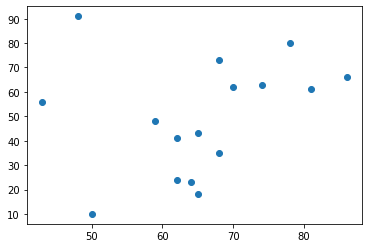

In [14]:
muestra_relacion_energia_optimismo(REGISTROS)

La salida de la celda de test debería ser la siguiente:

<img src="./img/test.png" alt="Drawing" style="width:8cm;"/>